# Notebook 7 - Clasificador Semi-Supervisado


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1. Clasificando números escritos a mano (MNIST Dataset).

El primer día del curso les hice la pregunta: ¿Cómo programarían un clasificador de dígitos, que para una imagen donde aparece un número escrito a mano, reconozca cuál es el dígito (de 0 a 9)?

Bueno, pues hoy vamos a aplicar todas las herramientas aprendidas durante estas semanas para intentar resolver este problema. Trabajaremos sobre el conocidísimo dataset MNIST (https://en.wikipedia.org/wiki/MNIST_database). Este dataset contiene 20.000 muestras de imagenes de 28x28 píxeles (784 píxeles), que nosotros trataremos como variables independientes. Es decir, trabajaremos con un dataset de dimensiones 5620x64. Cada una de las variables de entrada contiene un valor entero que varía de 0 a 255 indicando la intensidad en escala de grises del pixel correspondiente.

> > > ![texto alternativo](https://learnmachinelearning.files.wordpress.com/2017/08/mnist.png)

De la misma forma tenemos un vector de salida $Y$ que contiene el dígito identificado en cada una de las clases. Pero... ¿Podemos intentar hacer un clasificador que no haga uso de todas estas etiquetas? ¡Vamos a verlo!

---

**Tu tarea:**

1. Utiliza las herramientas de análisis exploratorio que ya conocemos para responder a las siguientes preguntas:

> 1.   ¿Están las clases a predecir balanceadas? ¿En qué  puede afectar esto a la calidad del análisis? ¿Tiene solución?
> 2.   ¿Son comparables los rangos de valores de cada variable? ¿En qué  puede afectar esto a la calidad del análisis? ¿Tiene solución?
> 3.   ¿Existe correlación entre las variables? ¿En qué  puede afectar esto a la calidad del análisis? ¿Tiene solución?
> 4.   ¿Podemos reducir el número de variables? ¿En qué puede afectar esto a la calidad del análisis? ¿Tiene solución?

> > **Aplica la solución donde creas conveniente.**

2.  Ahora imaginemos que queremos crear nuestro clasificador, pero que no contamos con los recursos económicos suficientes para etiquetar nuestros datos (vamos a asumir que no contamos con el vector $Y$), y por tanto no podemos gastar tanto dinero en etiquetar cada punto. ¿Qué hacemos? Vamos a probar a hacer un análisis semi-supervisado.

> 1.   Utiliza el algoritmo de clusterización K-means (feel free para usar Sklearn) para ver si puede identificar *clusters* dentro de tus datos (esto es análisis no supervisado, y solo trabajamos con nuestros datos de entrada). Utiliza el método adecuado para encontrar el número de clusters ***k*** óptimo.
> 2.  Una vez hayas encontrado tus *clusters*, "gasta" recursos para etiquetar 50 valores aleatorios de tu dataset. Es decir, selecciona aletoriamente 50 puntos de tu conjunto de datos y comprueba su etiqueta en el vector $Y$.
> 3.  Utiliza estas 50 etiquetas (si te fijas es menos del 1% del tamaño original del dataset) para ver cuál es la etiqueta más frecuente en cada uno de los clusters identificados en el primer apartado, y asigna a todos los elementos del cluster la etiqueta más frecuente.
> 4. Finalmente evalua la calidad de tus predicciones con los puntos que no hayas seleccionado (es decir, los $n - 50$ elementos restantes en $Y$) y comprueba cuál ha sido la tasa de acierto del modelo. Puedes incluir estos 4 pasos dentro de un bucle que los repita varias veces y calcule la media de esta métrica para reducir los efectos de la aleatoriedad al seleccionar los 50 puntos.

> > ¿Qué tal ha sido el rendimiento de nuestro modelo semi-supervisado?

> 5. (**Bonus**) Comprueba cuál sería el rendimiento real de nuestro modelo si lo hubieramos entrenado de forma supervisada con todos nuestros datos (teniendo en cuenta el dejar un conjunto de prueba para evaluar que no existe *overfitting*). Prueba con los diferentes modelos que hemos estudiado: *Regresión Lineal Múltiple y Polinomial*, *Regresión Logística*, *KNN*.

> > ¿Mejora mucho el rendimiento?

**Pista:** Ten en cuenta que si en algún momento quisieras visualizar el contenido de una imagen, tendrás que tomar la fila que contenga las 64 variables de entrada y hacer un reshape de tus variables a las dimensiones 8x8:


``` 
# Redimensionamos y visualizamos.
plt.matshow(X[0,:].reshape(8,8)) 
```




In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.datasets      import load_digits
from sklearn.decomposition import PCA 

# Cargamos el dataset desde el archivo.
mnist = pd.read_csv("./sample_data/mnist_train_small.csv", header=None).as_matrix()

# Guardamos las variables X e Y.
X, Y = mnist[:, 1:], mnist[:, 0:1]

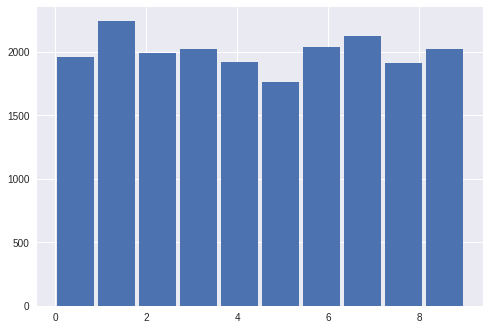

In [0]:
# ¿Están las clases balanceadas?
plt.hist(Y,rwidth=0.9)
plt.show()

In [0]:
# ¿Podemos reducir el número de variables?
Xt = PCA(n_components=0.90).fit_transform(X)

print("PCA: Se reduce de", X.shape[1], "columnas a sólo", Xt.shape[1], "columnas.")

PCA: Se reduce de 784 columnas a sólo 87 columnas.


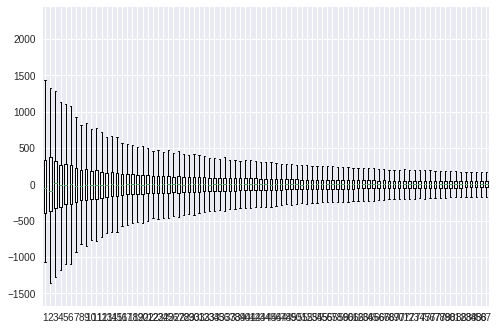

In [0]:
# ¿Están las clases balanceadas?
plt.boxplot(Xt)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


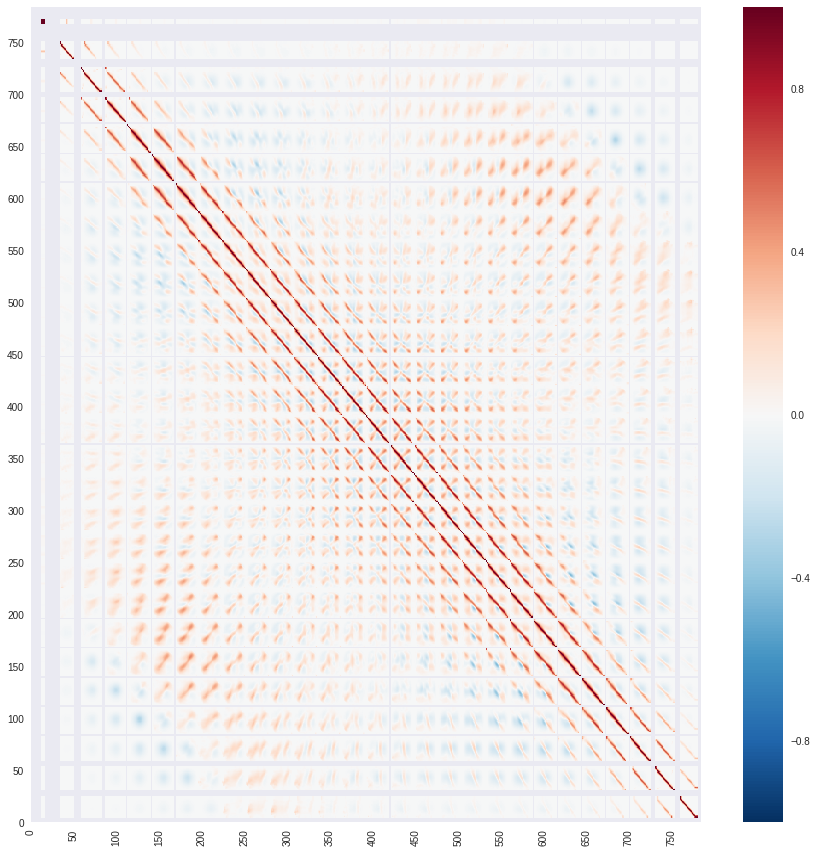

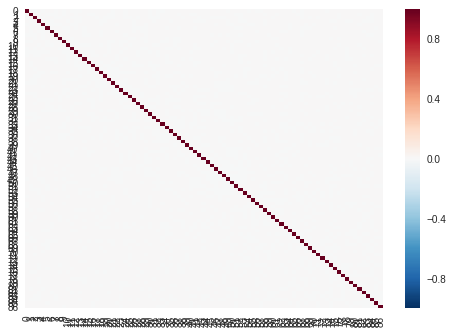

In [0]:
import matplotlib.ticker as ticker

# ¿Podemos reducir el número de variables?
fig = plt.figure(figsize=(15,15))

ax = sb.heatmap(np.corrcoef(X.T))

ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

sb.heatmap(np.corrcoef(Xt.T))
plt.show()

In [0]:
# # Una vez hemos explorado la naturaleza de nuestros datos y los hemos preprocesado
# # para sacarles el mayor partido en el análisis, vamos a realizar la clusterización.

# from sklearn.cluster import KMeans

# wcss = []

# # Primero buscamos la k óptima para la clusterización.
# for k in range(1, 25):
#   # Entrenamos el modelo.
#   km = KMeans(n_clusters=k)
#   km.fit_transform(Xt)
#   # Guardamos el WCSS
#   wcss.append(km.inertia_)

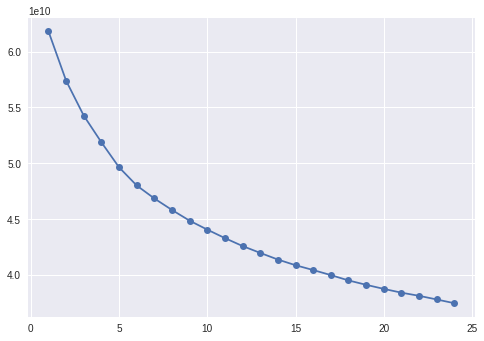

In [0]:
# Visualizamos el WCSS y comprobamos el punto óptimo. En
# este caso no está muy claro el valor de k entre el rango
# de 6 a 11. Nosotros sabemos que el valor real es 10.
plt.plot(range(1, len(wcss) + 1), wcss, "-o")

In [0]:
from sklearn.cluster import KMeans

k = 10 # Valor preasumido...

acc = []

iter = 10

for i in range(iter):

  print("Completado: ", i / iter * 100, "%")
  
  # Entrenamos el modelo con la k identificada.
  km = KMeans(n_clusters=k)
  km.fit_transform(Xt)

  # Obtenemos los centroides y las etiquetas.
  centr = km.cluster_centers_
  labls = km.labels_

  # Una vez tenemos los clusters identificados, vamos a "etiquetar"
  # 50 muestras elegidas aleatoriamente de nuestro vector Y. 
  m = 50

  # Calculamos cuál es la etiqueta más frecuente para cada cluster. Se permiten etiquetas repetidas.
  c_labels = [np.argmax(np.bincount(np.random.choice(Y[labls == c].ravel(), m // k))) for c in range(k)]

  # Generamos el vector donde guardaremos las predicciones.
  pY = np.zeros(Y.shape)

  # Y elegimos a todos los puntos de dicho centroide.
  for c in range(k):

    pY[labls == c] = c_labels[c]
    
  # Guardamos el score obtenido.
  acc.append((np.sum(pY == Y) - m) / pY.shape[0])

  #   fig, ax = plt.subplots(num=c)
  #   plt.title("Predicted :" + str(c_labels[c]))
  #   ax.matshow(np.mean(X[labls == c], axis=0).reshape(28, 28))
  
print("-----")
print("Accuracy media:", np.mean(acc), " - SEMI-SUP (Kmeans) Entrenado con el", m / pY.shape[0] * 100, "% de los datos.")

Completado:  0.0 %
Completado:  10.0 %
Completado:  20.0 %
Completado:  30.0 %
Completado:  40.0 %
Completado:  50.0 %
Completado:  60.0 %
Completado:  70.0 %
Completado:  80.0 %
Completado:  90.0 %
-----
Accuracy media: 0.5324999999999999  - SEMI-SUP (Kmeans) Entrenado con el 0.25 % de los datos.


In [0]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

iter = 10

acc = []

for i in range(iter):

  print("Completado: ", i / iter * 100, "%")
 
  X_tr, X_te, Y_tr, Y_te = train_test_split(X,Y)

  lo = LogisticRegression(multi_class='multinomial', solver="lbfgs").fit(X_tr, Y_tr.ravel())
  
  acc.append(lo.score(X_te, Y_te))
  
print("-----")
print("Accuracy media:", np.mean(acc), " - SUP (Log.Reg) Entrenado con el", X_tr.shape[0] / pY.shape[0] * 100, "% de los datos.")

Completado:  0.0 %
Completado:  10.0 %
Completado:  20.0 %
Completado:  30.0 %
Completado:  40.0 %
Completado:  50.0 %
Completado:  60.0 %
Completado:  70.0 %
Completado:  80.0 %
Completado:  90.0 %
-----
Accuracy media: 0.8975399999999999  - SUP (Log.Reg) Entrenado con el 75.0 % de los datos.
